In [1]:
library(pastecs)
library(stargazer)
library(ggplot2)
library(cowplot)
library(dplyr)
library(reshape)
library(car)
library(sandwich)
library(grid)
library(gridExtra)
library(AER)


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:pastecs’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following object is masked from ‘package:cowplot’:

    stamp


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘packag

In [2]:
# Loading and reading in the house values data: 
df <- read.csv('datasci_w203_waiver_house_values.csv')
head(df)

,crimeRate_pc,nonRetailBusiness,withWater,ageHouse,distanceToCity,distanceToHighway,pupilTeacherRatio,pctLowIncome,homeValue,pollutionIndex,nBedRooms
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,37.66190,0.1810,0,78.7,2.705847,24,23.2,18,245250,52.9,4.202
2,0.57834,0.0397,0,67.0,4.116839,5,16.0,9,1125000,42.5,6.297
3,0.04294,0.1504,0,77.3,7.815797,4,21.2,13,463500,31.4,4.249
4,22.59710,0.1810,0,89.5,1.950823,24,23.2,41,166500,55.0,3.000
5,0.06642,0.0405,0,74.4,5.539789,5,19.6,8,672750,36.0,4.860
6,0.11432,0.0856,0,71.3,5.360897,5,23.9,9,596250,37.0,4.781


In [3]:
# Generating a table of basic descriptive statistics for  each of the variables: 
stat.desc(df, desc = FALSE, norm = TRUE)[c("skewness", "kurtosis", "normtest.p"),]

,crimeRate_pc,nonRetailBusiness,withWater,ageHouse,distanceToCity,distanceToHighway,pupilTeacherRatio,pctLowIncome,homeValue,pollutionIndex,nBedRooms
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
skewness,4.962144e+00,2.879190e-01,3.434861e+00,-6.144568e-01,1.629047e+00,1.001838e+00,-7.717939e-01,9.667680e-01,1.056628e+00,7.182668e-01,3.689671e-01
kurtosis,3.398151e+01,-1.274231e+00,9.822845e+00,-9.468488e-01,2.868074e+00,-8.713511e-01,-3.476944e-01,6.102693e-01,1.545110e+00,-1.342260e-01,2.040928e+00
normtest.p,5.833560e-33,6.912843e-16,8.567986e-37,2.768896e-16,3.540932e-21,8.409470e-27,4.782212e-15,5.868945e-13,5.005930e-13,3.081725e-12,1.834827e-09


In [4]:
# Calculating the correlation matrix: 
correlations <- cor(df)
correlations

,crimeRate_pc,nonRetailBusiness,withWater,ageHouse,distanceToCity,distanceToHighway,pupilTeacherRatio,pctLowIncome,homeValue,pollutionIndex,nBedRooms
crimeRate_pc,1.00000000,0.40656156,-0.05440516,0.35613365,-0.3251275,0.63657060,0.30527706,0.46243779,-0.4026499,0.4095165,-0.22154445
nonRetailBusiness,0.40656156,1.00000000,0.08798933,0.64967319,-0.6558161,0.58449234,0.39963878,0.61303089,-0.5172397,0.7620313,-0.39315727
withWater,-0.05440516,0.08798933,1.00000000,0.09633466,-0.1132651,0.01066857,-0.09783496,-0.04215474,0.1450273,0.1318607,0.08282286
ageHouse,0.35613365,0.64967319,0.09633466,1.00000000,-0.7180751,0.46585378,0.28483045,0.59576108,-0.3798929,0.7335150,-0.23146516
distanceToCity,-0.32512752,-0.65581613,-0.11326505,-0.71807512,1.0000000,-0.44352557,-0.22705438,-0.45865994,0.2398852,-0.7071403,0.18330978
distanceToHighway,0.63657060,0.58449234,0.01066857,0.46585378,-0.4435256,1.00000000,0.48546340,0.48972060,-0.3950304,0.6048815,-0.19921020
pupilTeacherRatio,0.30527706,0.39963878,-0.09783496,0.28483045,-0.2270544,0.48546340,1.00000000,0.40413664,-0.5021076,0.1871227,-0.32511248
pctLowIncome,0.46243779,0.61303089,-0.04215474,0.59576108,-0.4586599,0.48972060,0.40413664,1.00000000,-0.7405816,0.5738045,-0.62817566
homeValue,-0.40264993,-0.51723974,0.14502732,-0.37989293,0.2398852,-0.39503044,-0.50210762,-0.74058158,1.0000000,-0.4384873,0.71383169
pollutionIndex,0.40951652,0.76203127,0.13186073,0.73351504,-0.7071403,0.60488145,0.18712274,0.57380447,-0.4384873,1.0000000,-0.30532760


In [5]:
# Checking if there are any variables that are perfectly correlated (except the diagonals):
length(correlations[correlations == 1])

[1] 11

In [6]:
# Checking if there are any variables that have a correlation coefficient that is greater than 0.9: 
not_perfect_correlations <- (correlations[correlations != 1])
length(not_perfect_correlations[not_perfect_correlations > 8])

[1] 0

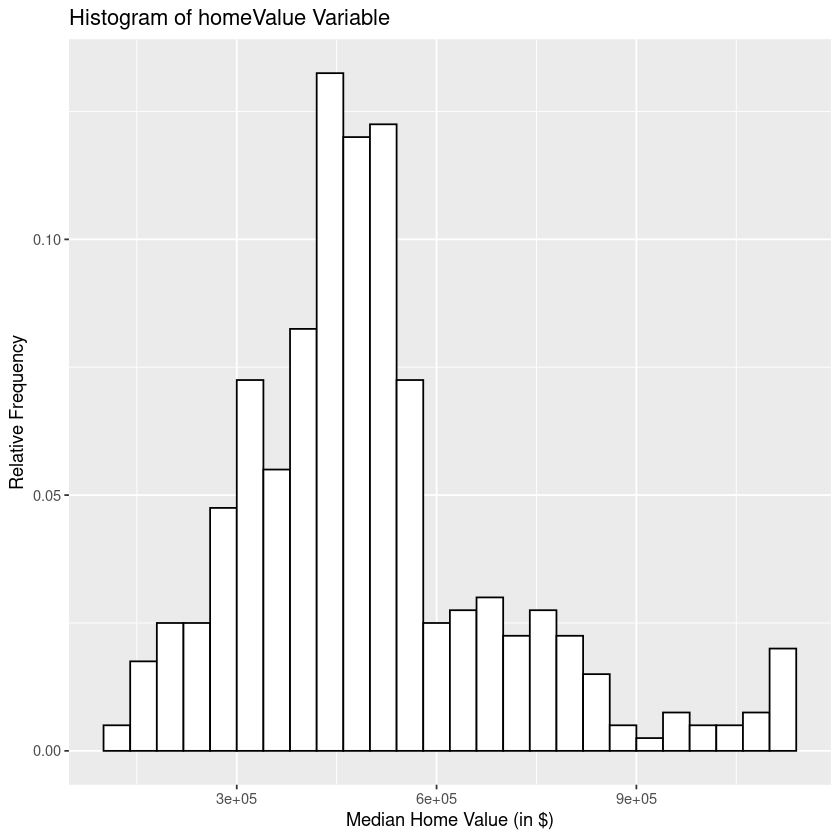

In [7]:
# Plotting histogram for home values:
homeValue_plot <- ggplot(df, aes(homeValue)) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth=40000, fill="white", colour="black") +
  labs(title="Histogram of homeValue Variable", x="Median Home Value (in $)", y="Relative Frequency") 
homeValue_plot

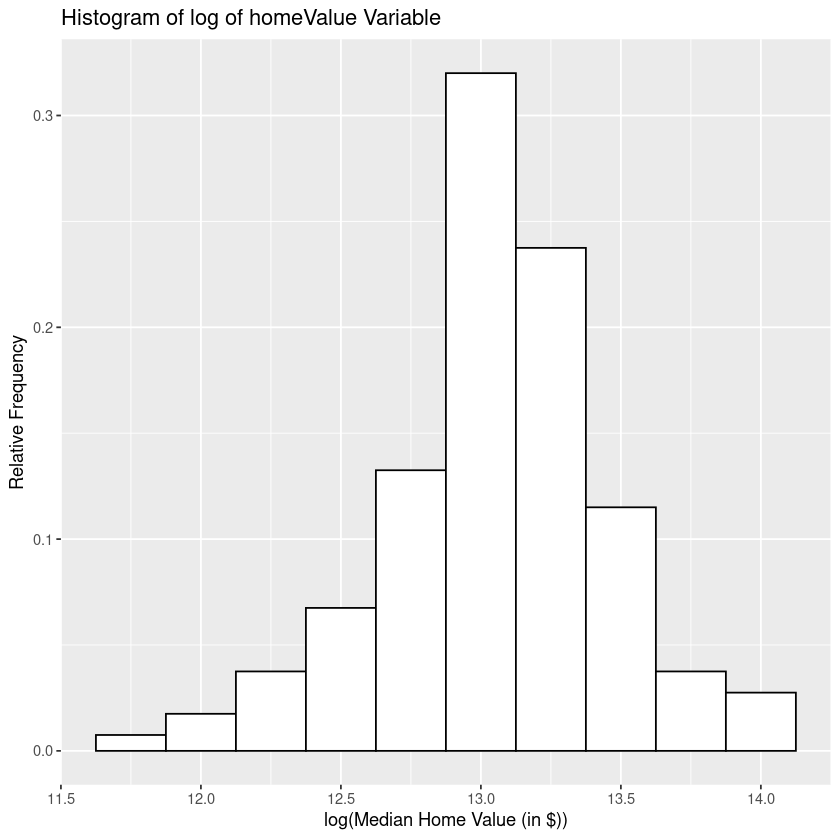

In [8]:
# Plotting histogram for log of home values:
logHomeValue_plot <- ggplot(df, aes(log(homeValue))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth=0.25,fill='white', colour='black') +
  labs(title="Histogram of log of homeValue Variable", x="log(Median Home Value (in $))", y="Relative Frequency") + theme_gray()
logHomeValue_plot

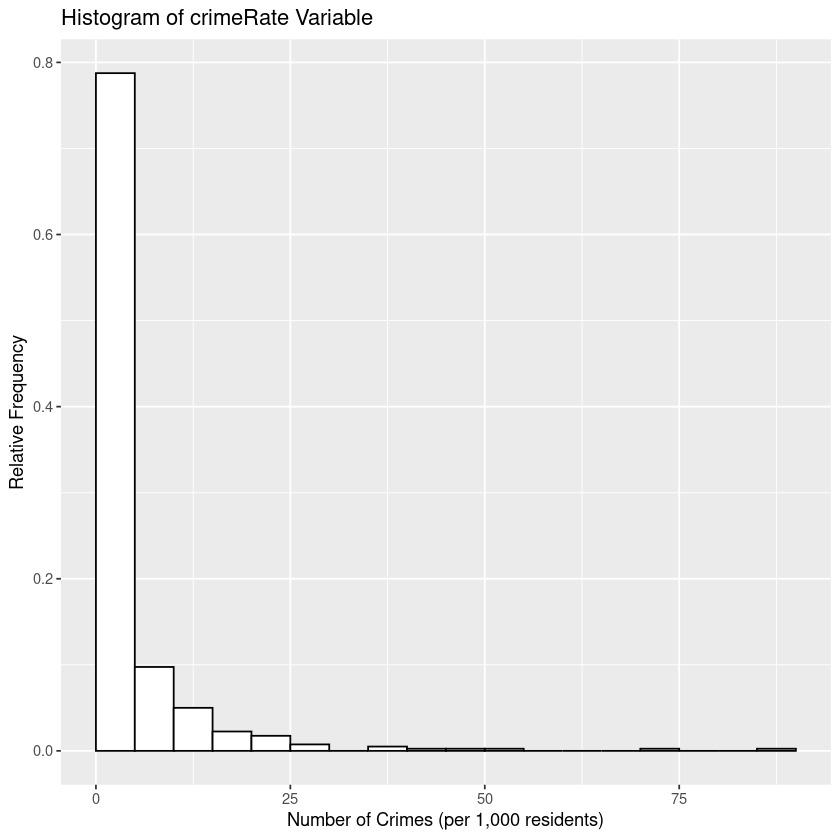

In [9]:
# Plotting histogram for crime rate:
crime_plot <- ggplot(df, aes(crimeRate_pc)) + geom_histogram(aes(y = (..count..)/sum(..count..)), boundary = 0, binwidth = 5, fill = 'white', colour = 'black',) + 
  labs(title = "Histogram of crimeRate Variable", x = "Number of Crimes (per 1,000 residents)", y = "Relative Frequency")
crime_plot

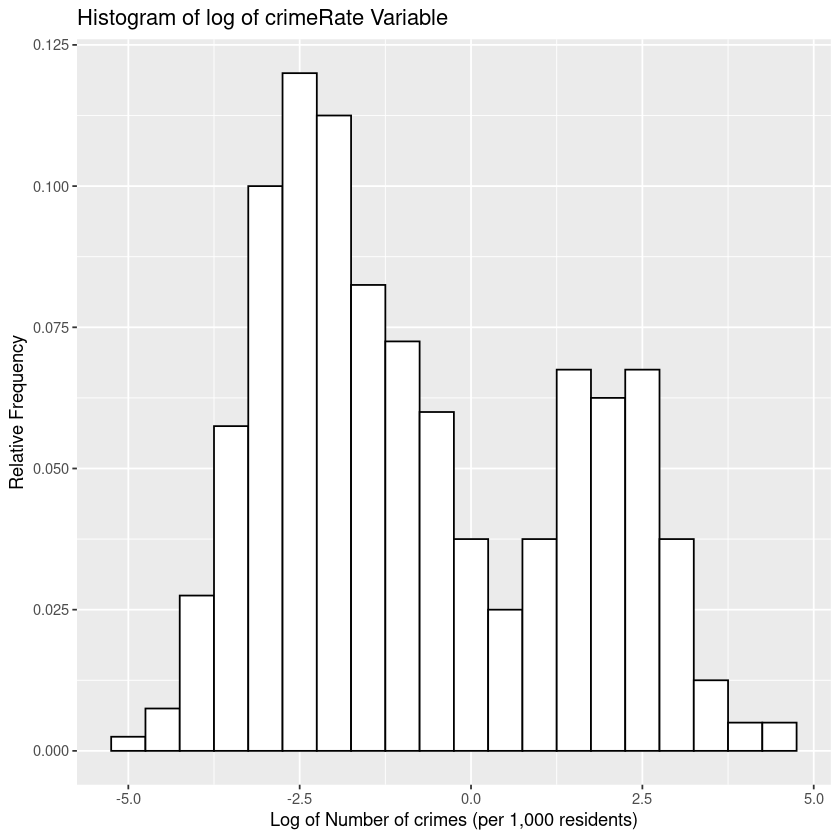

In [10]:
# Plotting histogram for log of crime rate:
log_Crime_plot <- ggplot(df, aes(log(crimeRate_pc))) + geom_histogram(aes(y = (..count..)/sum(..count..)), binwidth = .5, fill = 'white', colour = 'black') +
  labs(title = "Histogram of log of crimeRate Variable", x = "Log of Number of crimes (per 1,000 residents)", y = "Relative Frequency") 
log_Crime_plot

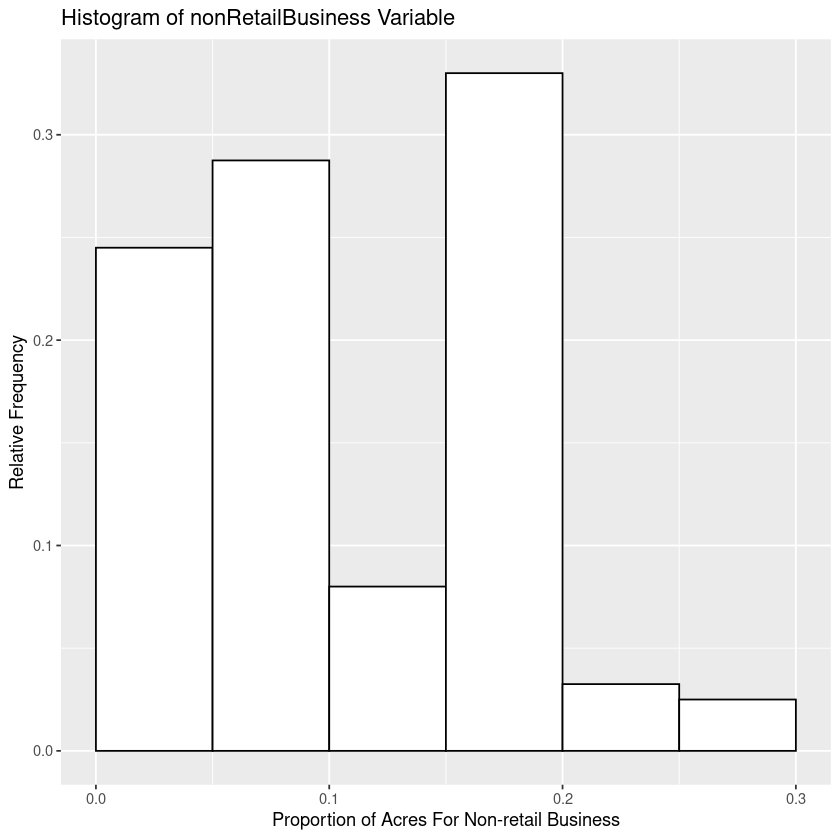

In [11]:
# Plotting histogram for non retail businesses:
business_plot <- ggplot(df, aes(nonRetailBusiness)) + 
  geom_histogram(aes(y=(..count..)/sum(..count..)), boundary = 0, binwidth = 0.05, fill = 'white', colour = 'black')+
  labs(title="Histogram of nonRetailBusiness Variable", x = "Proportion of Acres For Non-retail Business", y="Relative Frequency")
business_plot

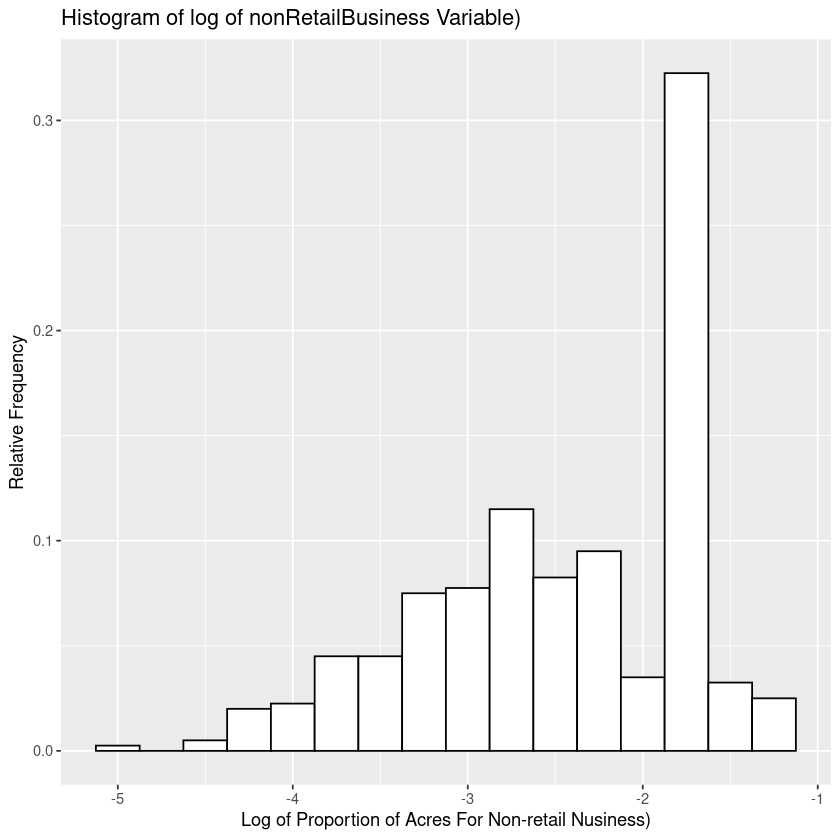

In [12]:
# Plotting histogram for log of non retail businesses:
log_Business_plot <- ggplot(df, aes(log(nonRetailBusiness))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = .25, fill='white', colour='black') + 
  labs(title="Histogram of log of nonRetailBusiness Variable)", x = "Log of Proportion of Acres For Non-retail Nusiness)",y="Relative Frequency") 
log_Business_plot

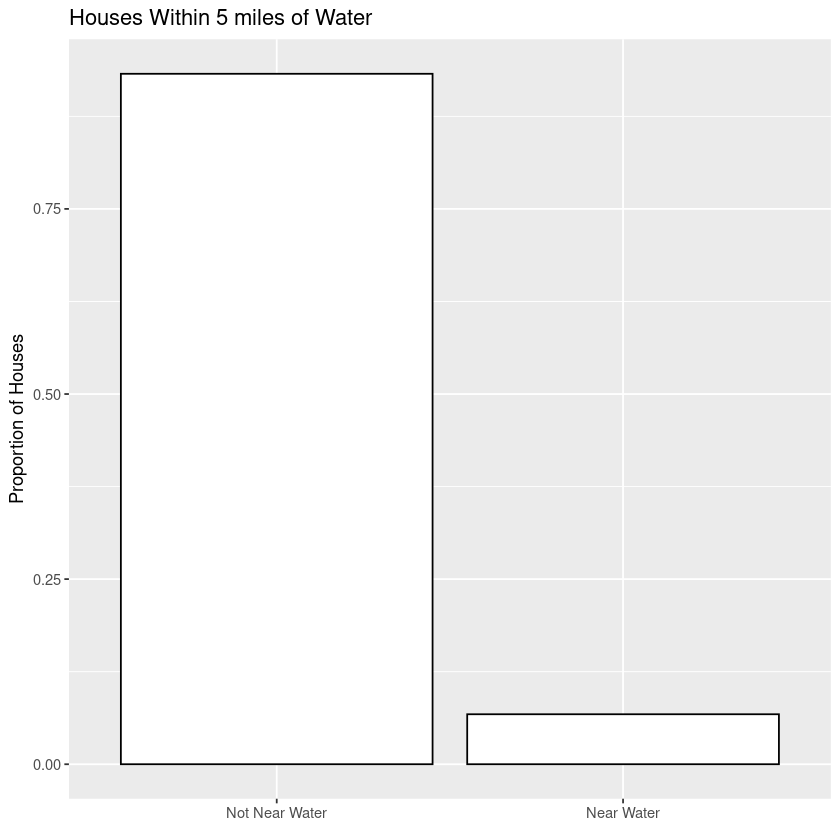

In [13]:
# Plotting proportion of houses near a body of water and not near a body of water:
ggplot(df, aes(factor(withWater, labels = c('Not Near Water', 'Near Water')))) + 
  geom_bar(aes(y = (..count..)/sum(..count..)), fill='white', colour='black') + 
  labs(title = "Houses Within 5 miles of Water", y = "Proportion of Houses", x = element_blank()) 

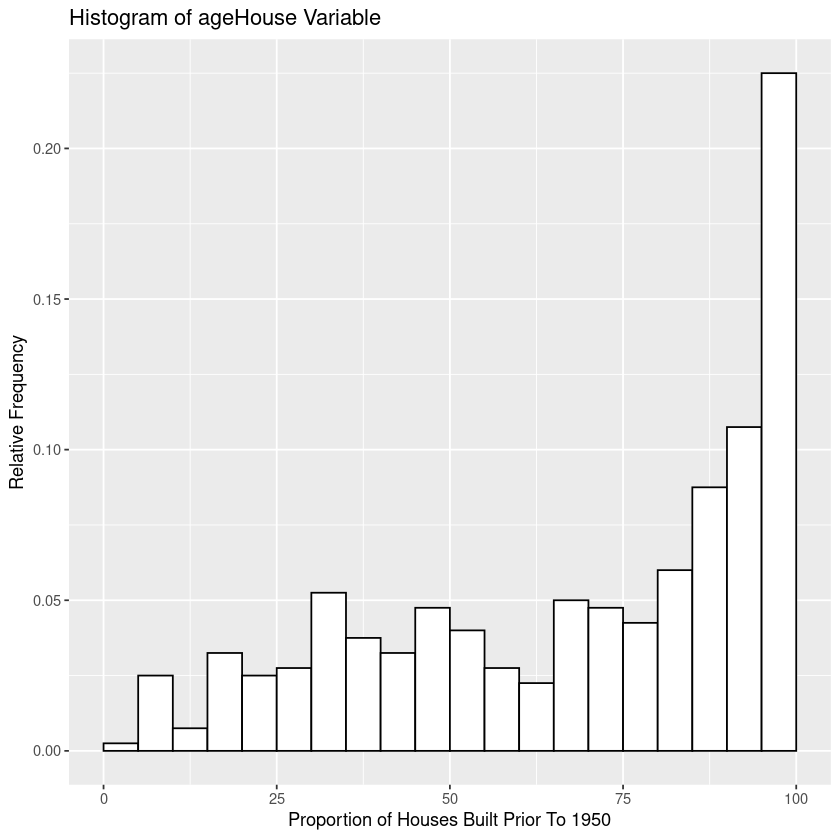

In [14]:
# Plotting histogram for age of houses:
house_plot <- ggplot(df, aes(ageHouse)) + geom_histogram(aes(y=(..count..)/sum(..count..)), boundary=0, binwidth = 5, fill='white', colour='black') +
  labs(title="Histogram of ageHouse Variable", x= "Proportion of Houses Built Prior To 1950", y= "Relative Frequency") 
house_plot

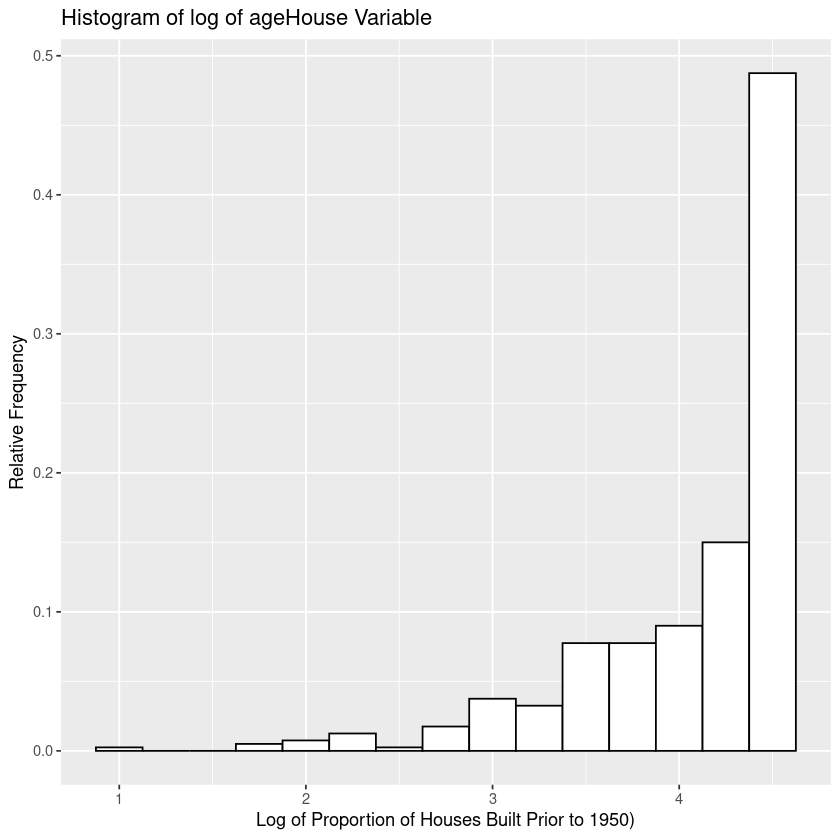

In [15]:
# Plotting histogram for log of age of houses:
log_House_plot <- ggplot(df, aes(log(ageHouse))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = 0.25, fill='white', colour='black') +
  labs(title="Histogram of log of ageHouse Variable", x= "Log of Proportion of Houses Built Prior to 1950)", y= "Relative Frequency") 
log_House_plot

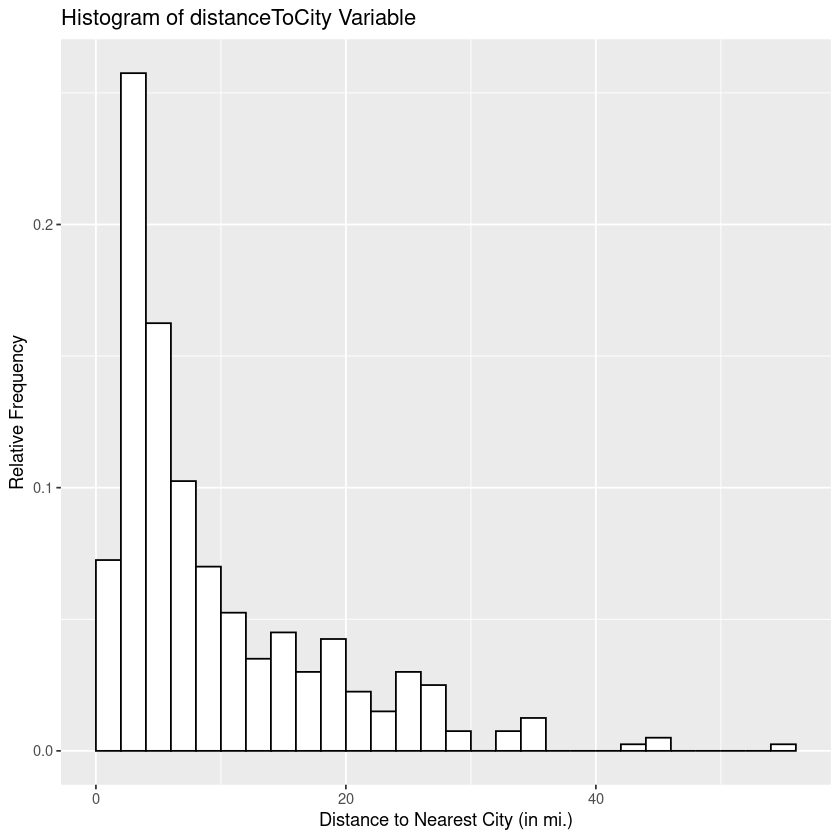

In [16]:
# Plotting histogram for distance to city: 
city_plot <- ggplot(df, aes(distanceToCity)) + geom_histogram(aes(y=(..count..)/sum(..count..)), boundary=0, binwidth = 2,fill='white', colour='black') +
  labs(title="Histogram of distanceToCity Variable", x = "Distance to Nearest City (in mi.)", y = "Relative Frequency")
city_plot

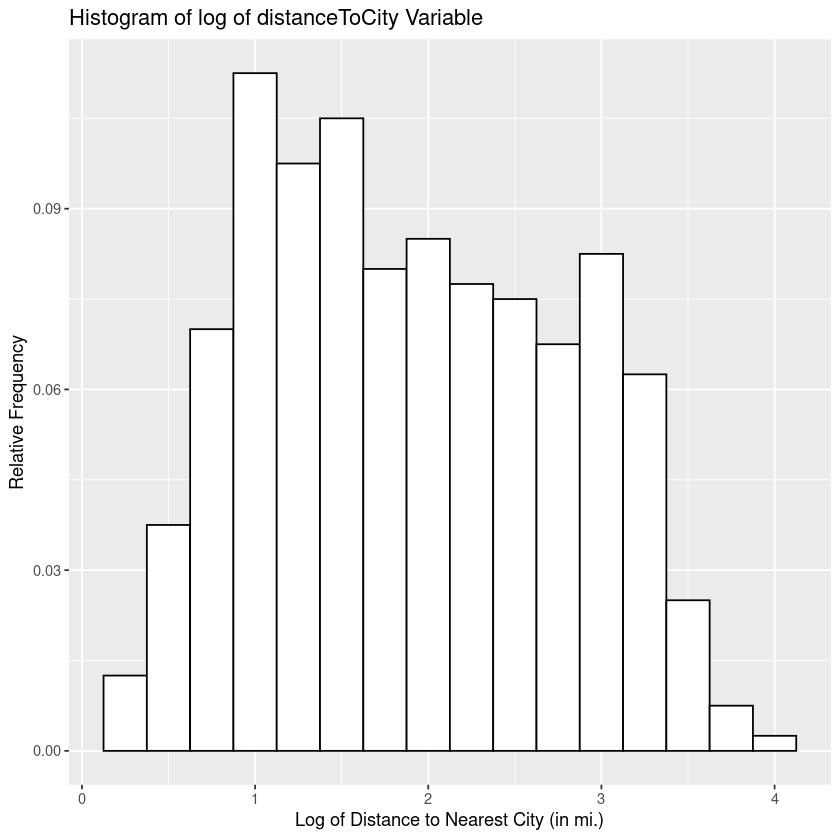

In [17]:
# Plotting histogram for log of distance to city: 
log_City_plot <- ggplot(df, aes(log(distanceToCity))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = 0.25,fill='white', colour='black') +
  labs(title="Histogram of log of distanceToCity Variable", x = "Log of Distance to Nearest City (in mi.)", y  = "Relative Frequency") 
log_City_plot

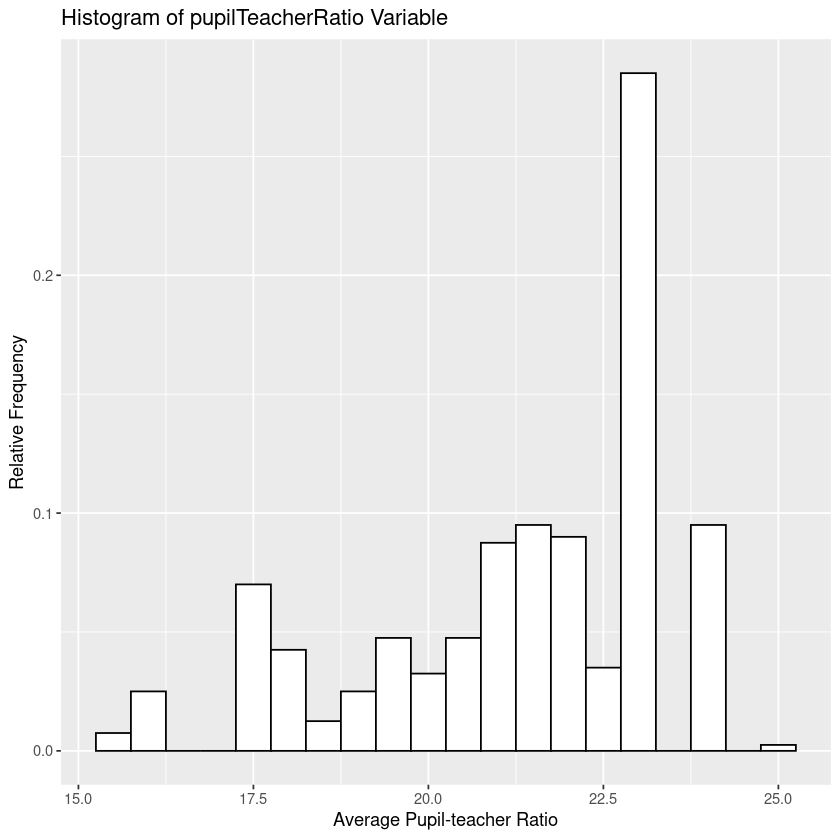

In [18]:
# Plotting histogram for pupil to teacher ratio:
pt_plot <- ggplot(df, aes(pupilTeacherRatio)) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = .5, fill='white', colour='black') +
  labs(title="Histogram of pupilTeacherRatio Variable", x="Average Pupil-teacher Ratio", y="Relative Frequency") 
pt_plot

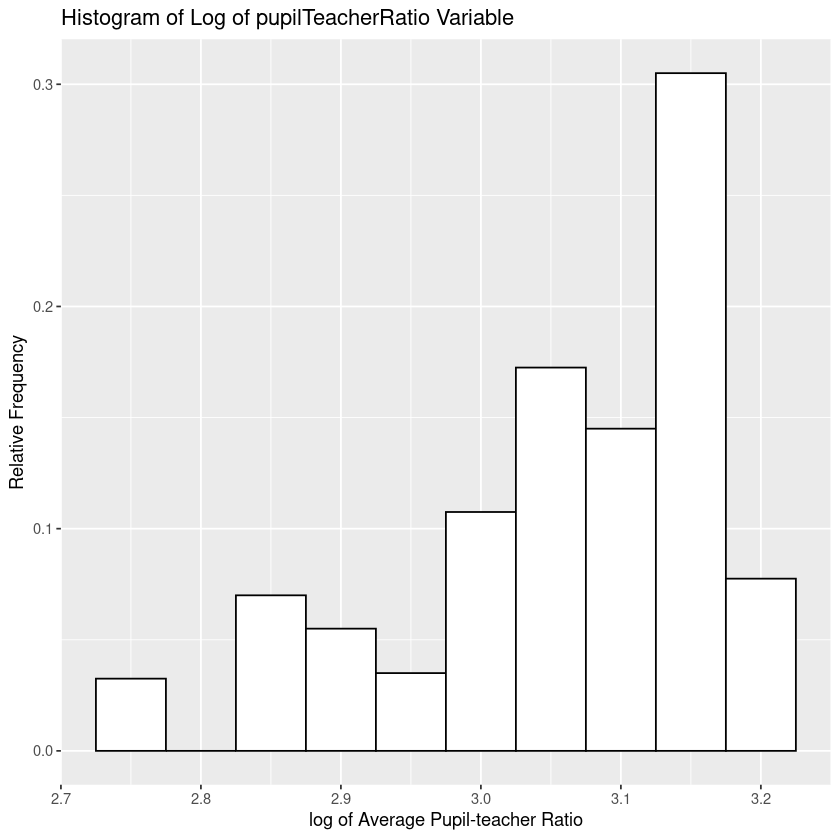

In [19]:
# Plotting histogram for log of pupil to teacher ratio:
log_pt_plot <- ggplot(df, aes(log(pupilTeacherRatio))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = .05, fill='white', colour='black') +
  labs(title="Histogram of Log of pupilTeacherRatio Variable", x="log of Average Pupil-teacher Ratio", y="Relative Frequency")
log_pt_plot

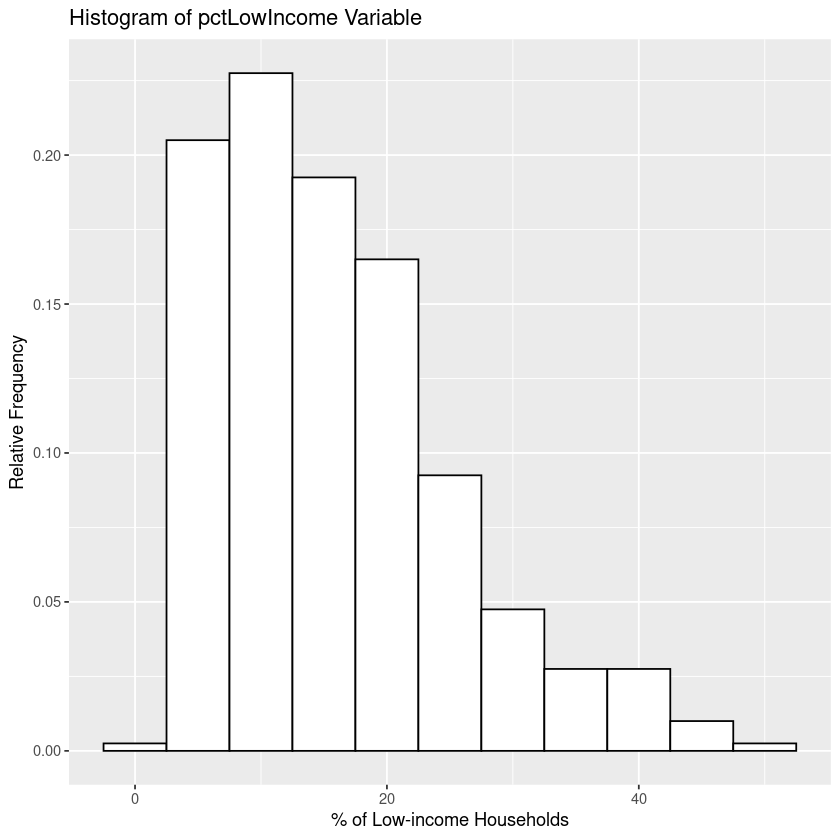

In [20]:
# Plotting histogram for percentage of low income households:
pctlowIncome_plot <- ggplot(df, aes(pctLowIncome)) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = 5, fill='white', colour='black') +
  labs(title="Histogram of pctLowIncome Variable", x="% of Low-income Households", y="Relative Frequency") 
pctlowIncome_plot

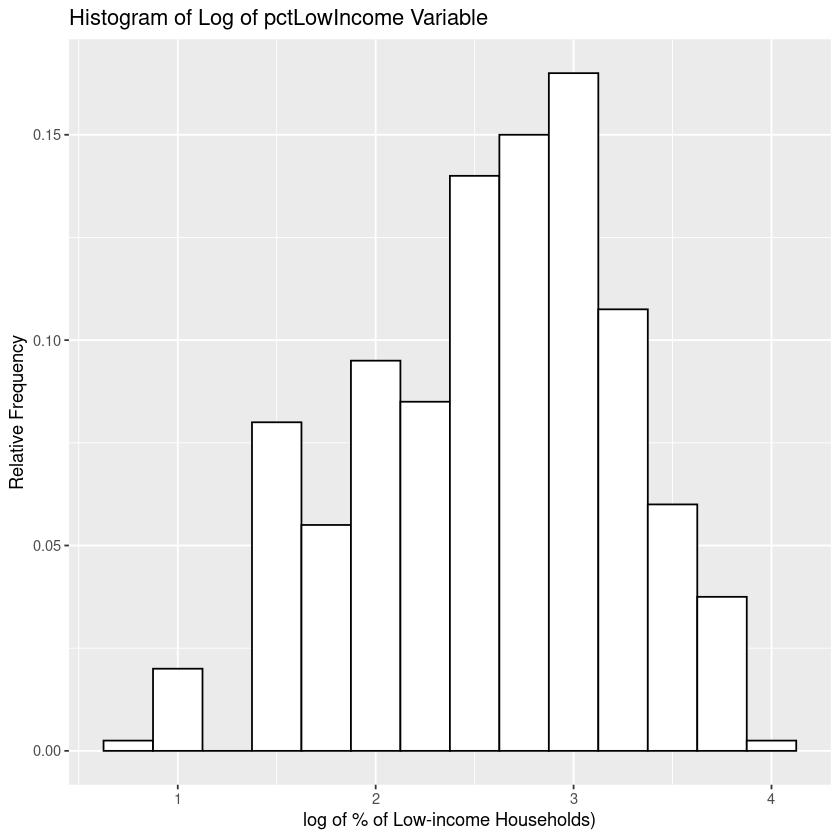

In [21]:
# Plotting histogram for log of percentage of low income households:
log_pctlowIncome_plot <- ggplot(df, aes(log(pctLowIncome))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = 0.25, fill='white', colour='black') +
  labs(title='Histogram of Log of pctLowIncome Variable', x='log of % of Low-income Households)', y='Relative Frequency')
log_pctlowIncome_plot

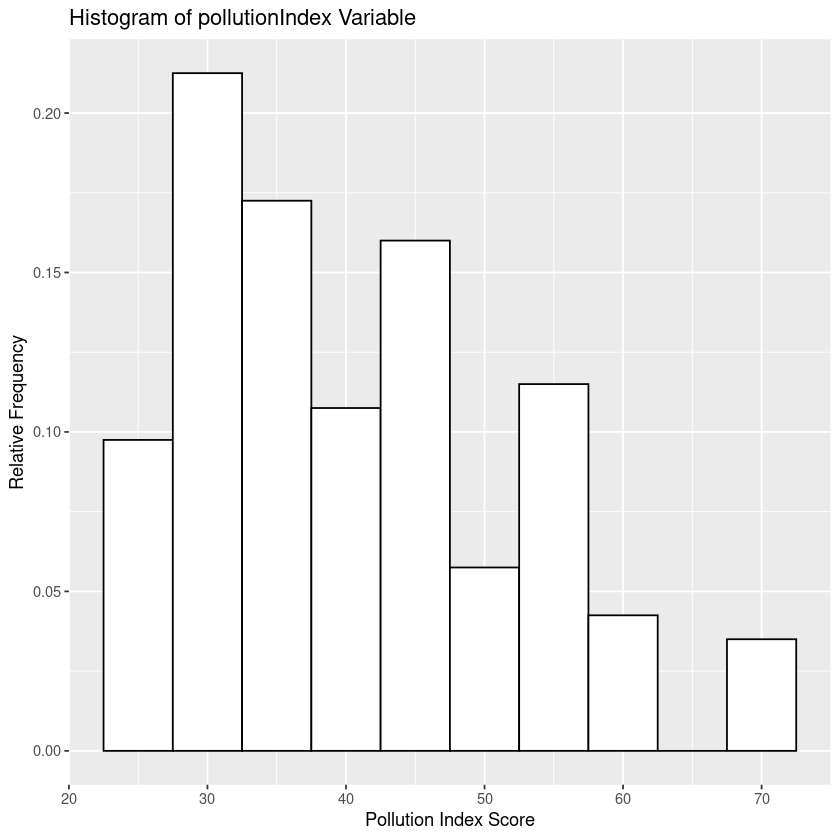

In [22]:
# Plotting histogram for pollution index:
pollutionIndex_plot <- ggplot(df, aes(pollutionIndex)) +
  geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth=5, fill='white', color='black') +
  labs(title="Histogram of pollutionIndex Variable", x="Pollution Index Score", y="Relative Frequency")
pollutionIndex_plot

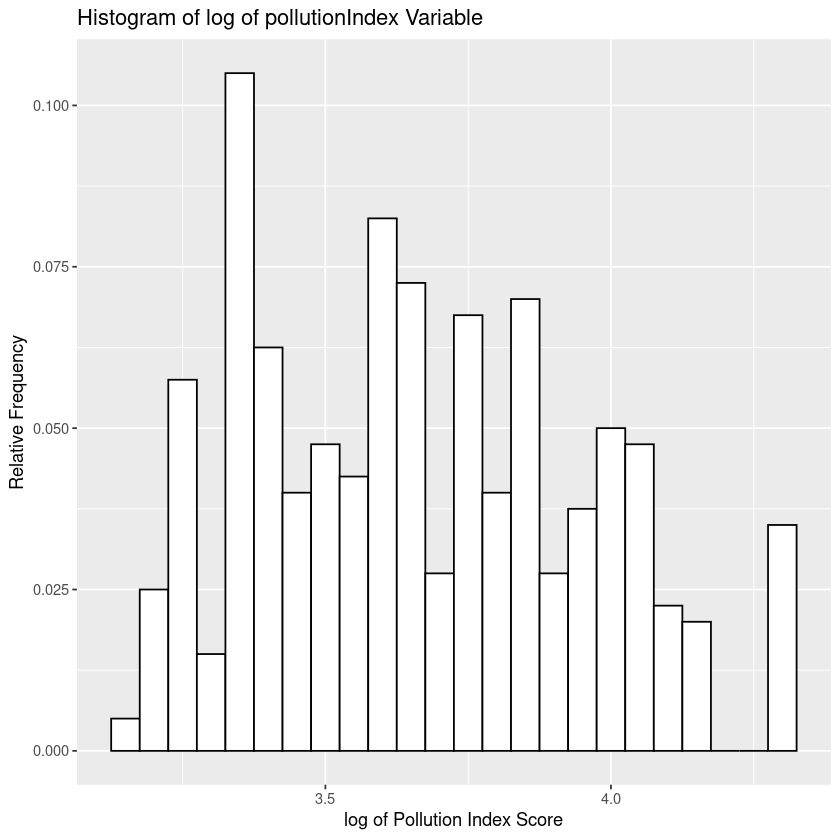

In [23]:
# Plotting histogram for log of pollution index:
log_pollutionIndex_plot <- ggplot(df, aes(log(pollutionIndex))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth=.05, fill='white', color='black', ) +
  labs(title="Histogram of log of pollutionIndex Variable", x="log of Pollution Index Score", y="Relative Frequency") 
log_pollutionIndex_plot

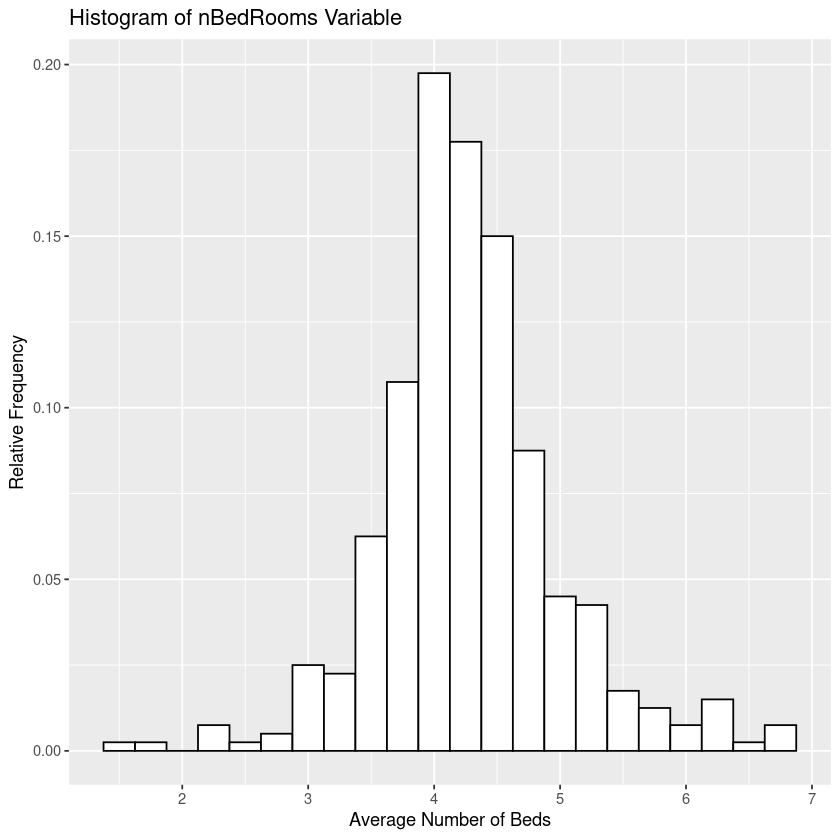

In [24]:
# Plotting histogram for avg number of beds: 
bedRooms_plot <- ggplot(df, aes(nBedRooms)) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = 0.25, fill='white', colour='black') +
  labs(title="Histogram of nBedRooms Variable", x="Average Number of Beds", y="Relative Frequency") 
bedRooms_plot

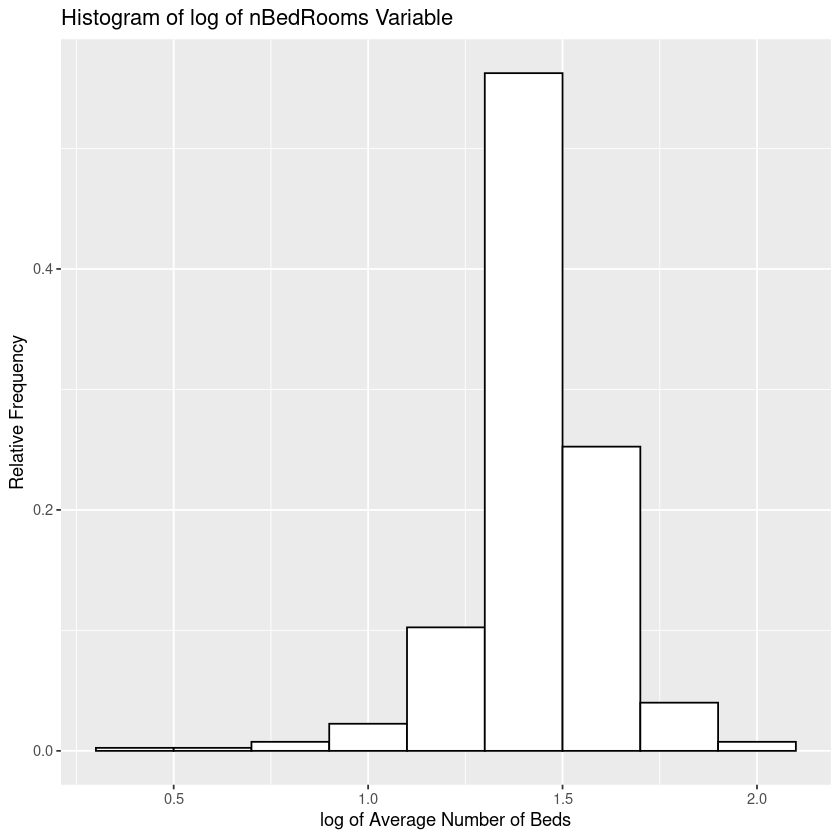

In [25]:
# Plotting histogram for log of avg number of beds: 
log_bedRooms_plot <- ggplot(df, aes(log(nBedRooms))) + geom_histogram(aes(y=(..count..)/sum(..count..)), binwidth = 0.2, fill='white', colour='black') +
  labs(title="Histogram of log of nBedRooms Variable", x="log of Average Number of Beds", y="Relative Frequency") 
log_bedRooms_plot

In [26]:
# Creating a table of summary statistics for all the features and the house value:
stargazer(df, title = "Summary Statistics for Given Features and House Value", summary.stat = c("mean", "sd", "min", "p25", "median", "p75", "max"), type='text')


Summary Statistics for Given Features and House Value
Statistic            Mean      St. Dev.     Min   Pctl(25)  Median  Pctl(75)    Max   
--------------------------------------------------------------------------------------
crimeRate_pc         3.763       8.872     0.006    0.083    0.266   3.675    88.976  
nonRetailBusiness    0.112       0.070     0.007    0.051    0.097   0.181     0.277  
withWater            0.068       0.251       0        0        0       0         1    
ageHouse            68.932      27.977     2.900   45.675   77.950   94.150   100.000 
distanceToCity       9.638       8.786     1.228    3.240    6.115   13.628   54.197  
distanceToHighway    9.582       8.672       1        4        5       24       24    
pupilTeacherRatio   21.391       2.168    15.600   19.900   21.900   23.200   25.000  
pctLowIncome        15.795       9.341       2        8       14       21       49    
homeValue         499,584.400 196,115.700 112,500 384,187.5 477,000 558,000

In [27]:
# Finding log of variables of interest: 
log_pollutionIndex <- log(df$pollutionIndex)
log_pctLowIncome <- log(df$pctLowIncome)
log_distanceToCity <-log(df$distanceToCity)
log_crimeRate <- log(df$crimeRate)
log_homeValue <- log(df$homeValue)

In [28]:
# Make a full and empty model with increasing number of features to select one based on Akaike information criterion: 
full <- lm(log_homeValue ~ ., data = df)
empty <- lm(log_homeValue ~ 1, data = df)
stepwise <- step(empty, scope = list(lower = empty, upper=full), k = log(500))

Start:  AIC=-733.93
log_homeValue ~ 1

                    Df Sum of Sq    RSS      AIC
+ homeValue          1    57.255  5.617 -1693.82
+ pctLowIncome       1    41.239 21.634 -1154.46
+ nBedRooms          1    26.243 36.629  -943.82
+ nonRetailBusiness  1    20.158 42.714  -882.34
+ crimeRate_pc       1    17.518 45.355  -858.35
+ pollutionIndex     1    16.514 46.359  -849.59
+ pupilTeacherRatio  1    15.624 47.249  -841.99
+ distanceToHighway  1    15.151 47.722  -838.00
+ ageHouse           1    13.002 49.870  -820.39
+ distanceToCity     1     6.153 56.720  -768.91
+ withWater          1     1.106 61.767  -734.81
<none>                           62.873  -733.93

Step:  AIC=-1693.82
log_homeValue ~ homeValue

                    Df Sum of Sq    RSS      AIC
+ crimeRate_pc       1     1.548  4.070 -1816.52
+ pctLowIncome       1     1.482  4.135 -1810.10
+ distanceToHighway  1     0.967  4.650 -1763.16
+ pollutionIndex     1     0.689  4.929 -1739.92
+ ageHouse           1     0.62

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”


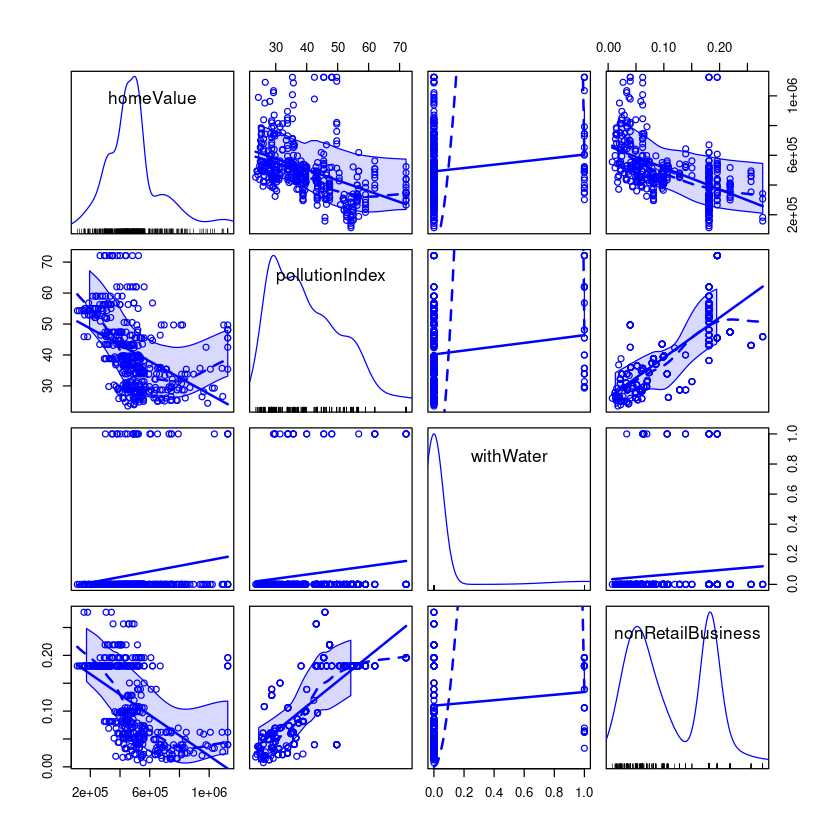

In [29]:
# Creating scatterplot grid for some of the variables with high AIC for visualization: 
scatterplotMatrix(~ homeValue + pollutionIndex + withWater + nonRetailBusiness, data = df)

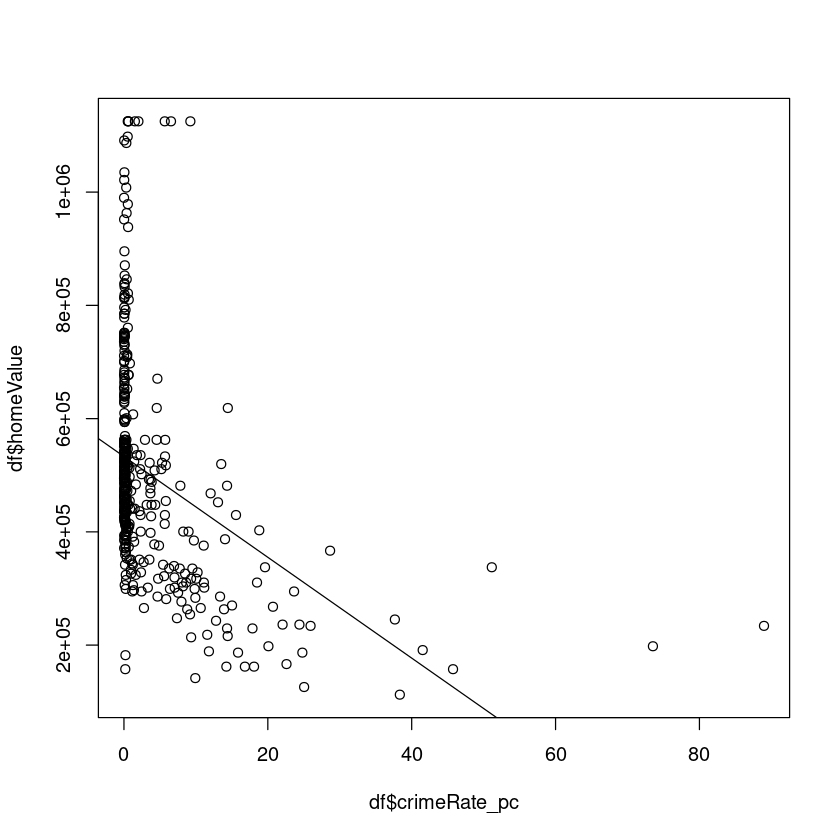

In [30]:
# Generating scatterplot of crime rate and home value:
crime_rate_scatter <- plot(df$crimeRate_pc, df$homeValue)
abline(lm(homeValue~crimeRate_pc, data=df))

# grid = arrangeGrob(crime_rate_scatter, non_retail_business_scatter, with_water_scatter,
#              age_house_scatter, dist_to_city_scatter, pt_ratio_scatter , 
#              low_income_scatter, pollution_scatter, rooms_scatter, nrow = 3, ncol = 3)

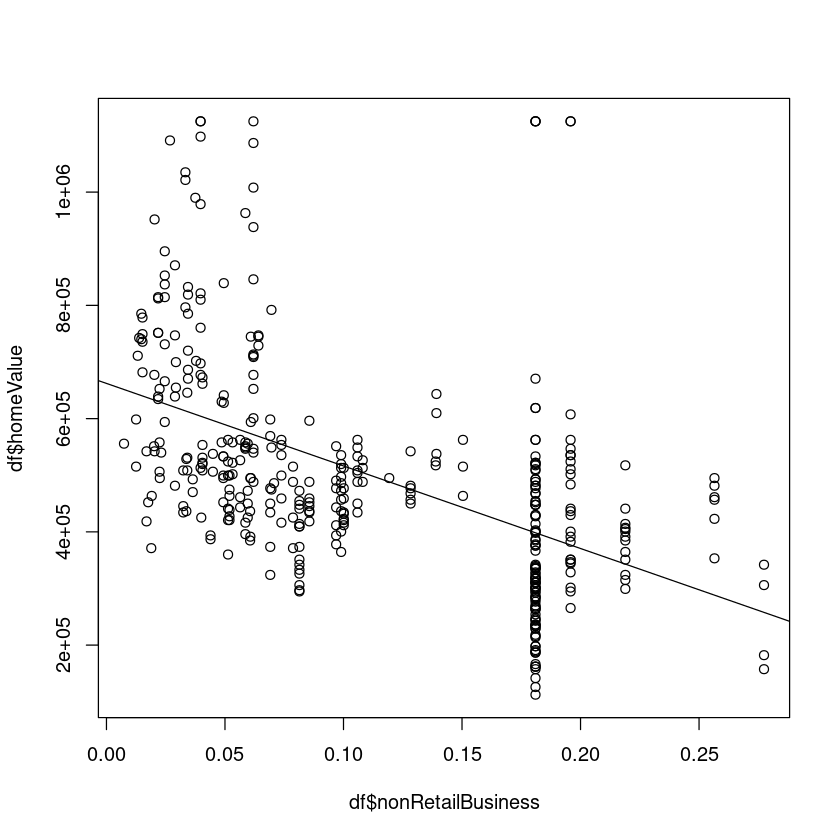

In [31]:
# Generating scatterplot of non retail businesses and home value:
non_retail_business_scatter <- plot(df$nonRetailBusiness, df$homeValue)
abline(lm(homeValue~nonRetailBusiness, data=df))

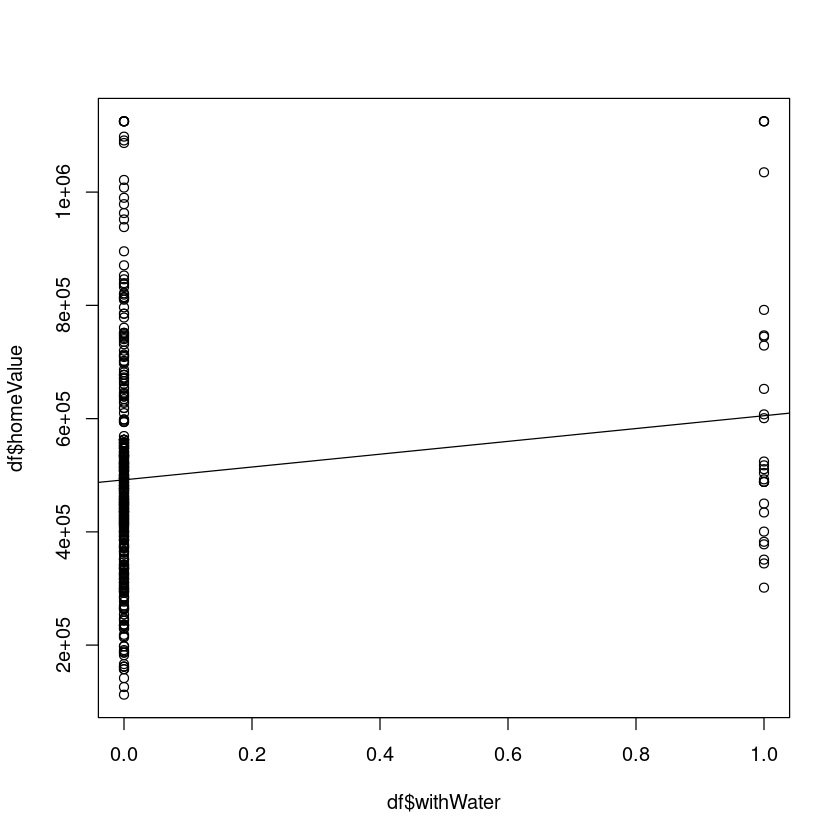

In [32]:
# Generating scatterplot of with water and home value:
with_water_scatter <- plot(df$withWater, df$homeValue)
abline(lm(homeValue~withWater, data=df))

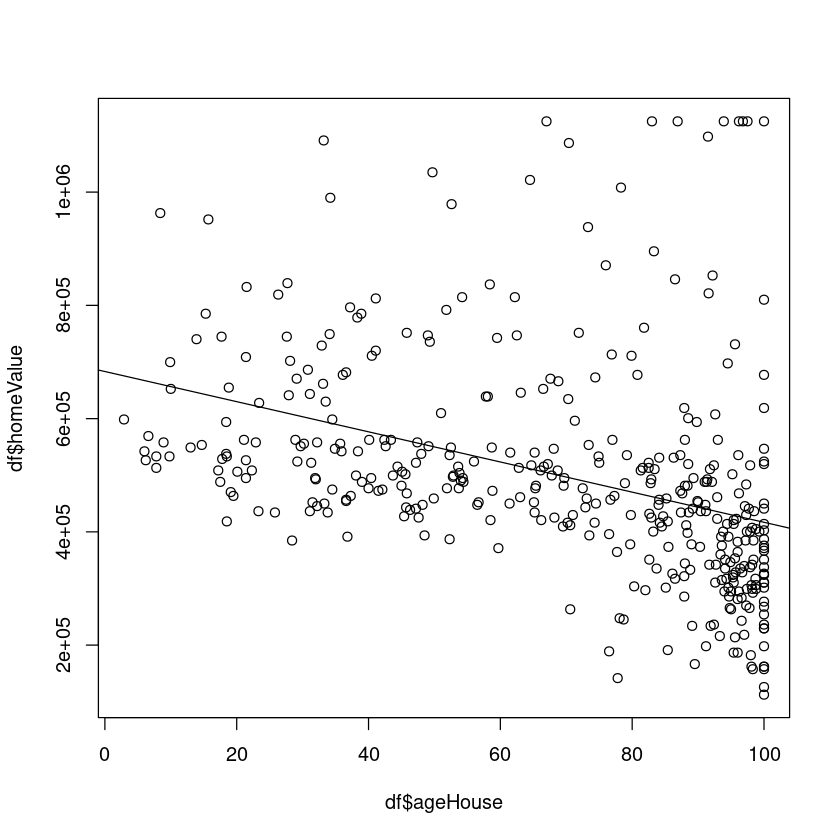

In [33]:
# Generating scatterplot of age house and home value:
age_house_scatter <- plot(df$ageHouse, df$homeValue)
abline(lm(homeValue~ageHouse, data=df))

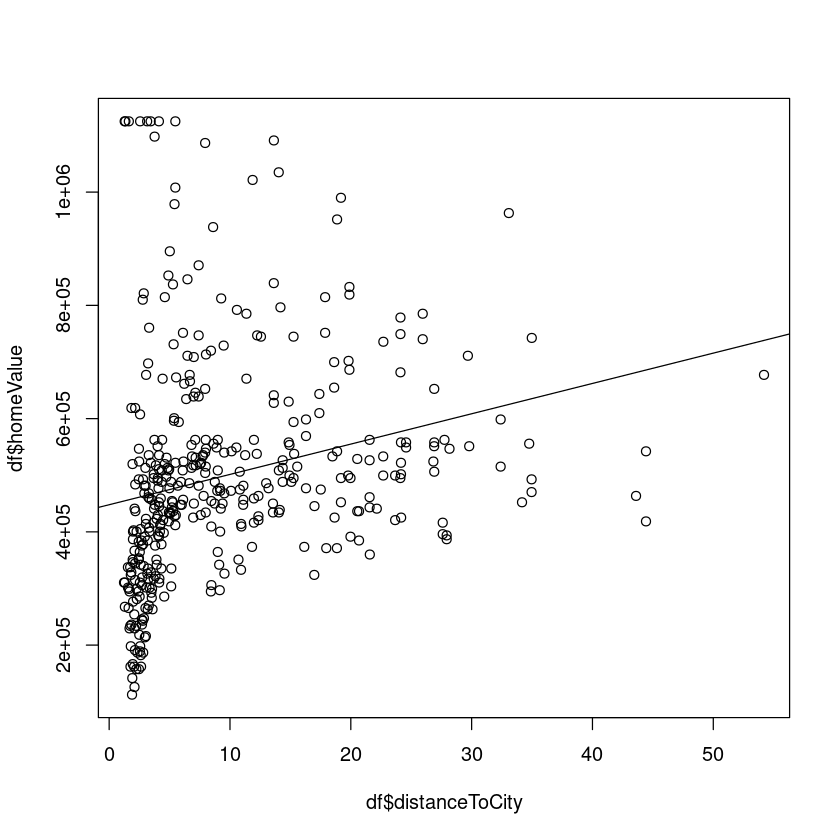

In [34]:
# Generating scatterplot of distance to city and home value:
dist_to_city_scatter <- plot(df$distanceToCity, df$homeValue)
abline(lm(homeValue~distanceToCity, data=df))

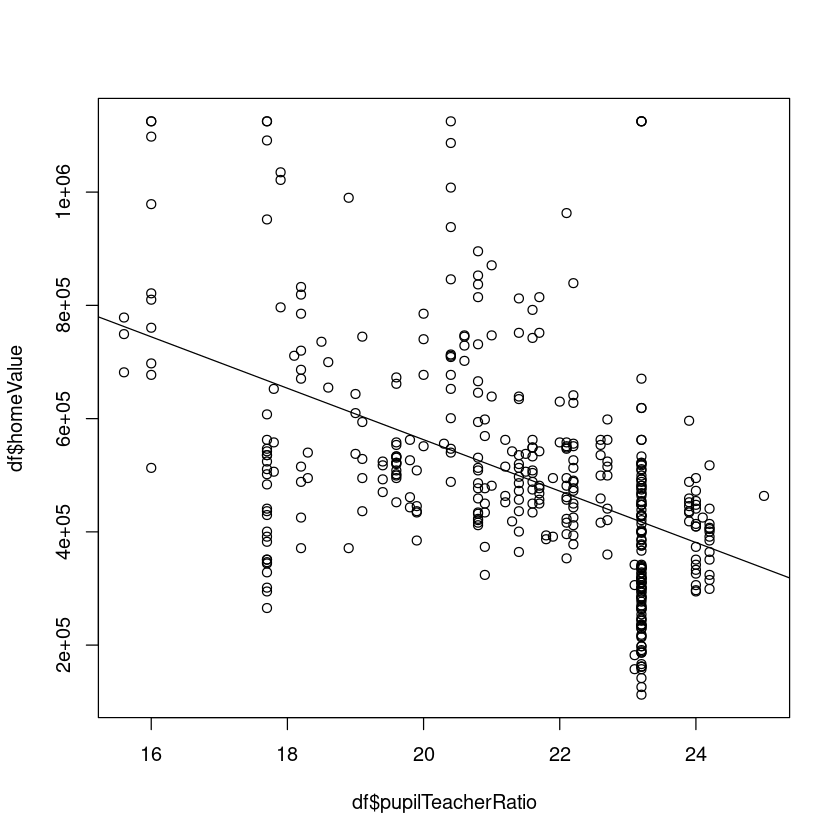

In [35]:
# Generating scatterplot of pupil to teacher ratio and home value:
pt_ratio_scatter <- plot(df$pupilTeacherRatio, df$homeValue)
abline(lm(homeValue~pupilTeacherRatio, data=df))

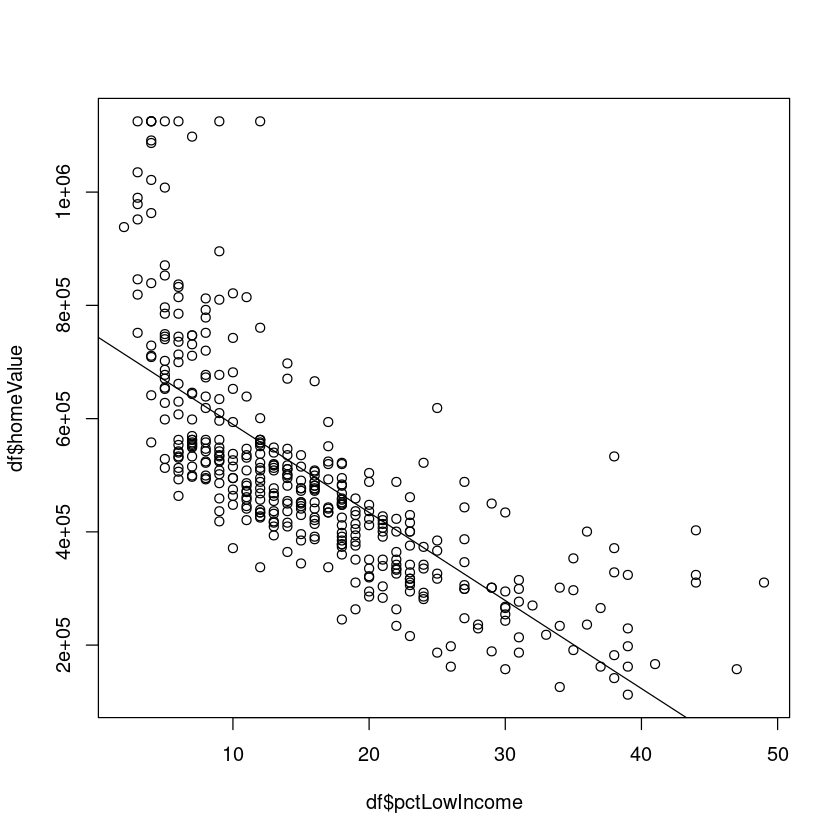

In [36]:
# Generating scatterplot of low income household percentage and home value:
low_income_scatter <- plot(df$pctLowIncome, df$homeValue)
abline(lm(homeValue~pctLowIncome, data=df))

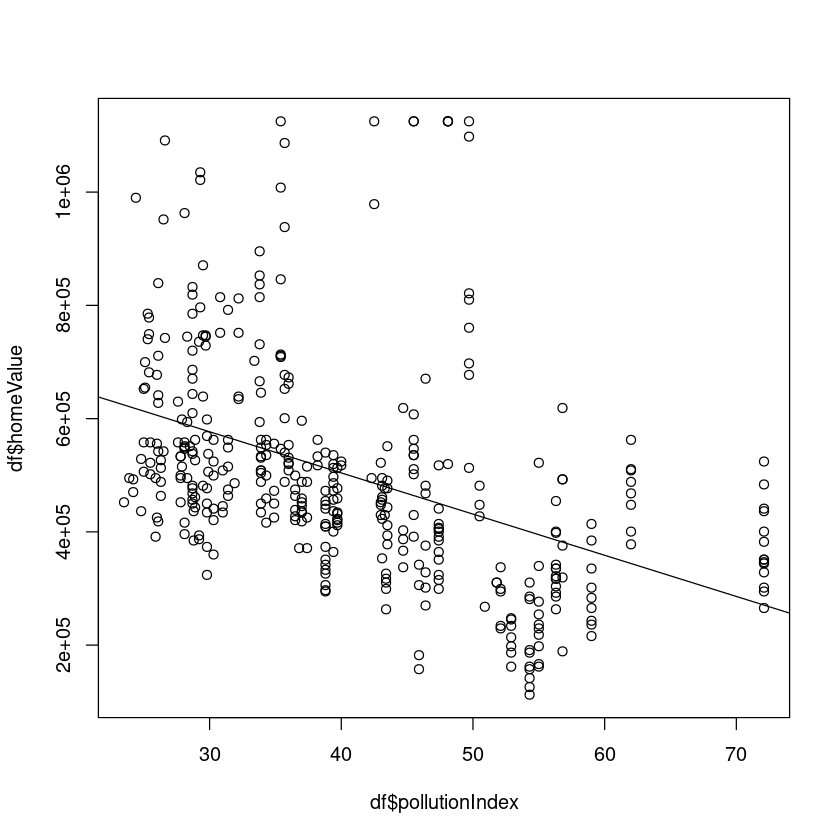

In [37]:
# Generating scatterplot of pollution and home value:
pollution_scatter <- plot(df$pollutionIndex, df$homeValue)
abline(lm(homeValue~pollutionIndex, data=df))

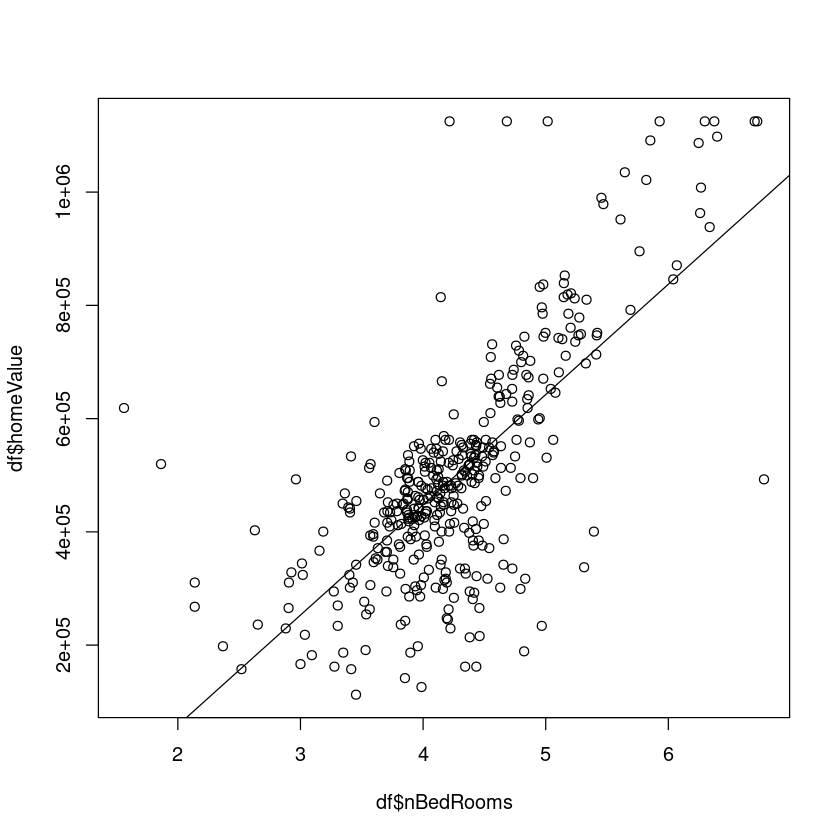

In [38]:
# Generating scatterplot of number of bedrooms and home value:
rooms_scatter <- plot(df$nBedRooms, df$homeValue)
abline(lm(homeValue~nBedRooms, data=df))

In [39]:
# Fits an IV regression by two-stage least squares for the top 3 variables: 
iv = ivreg(as.formula(paste("log_homeValue ~",  paste(names(stepwise$coefficients)[-1], collapse = " + "), " | ", 
       paste(c(names(stepwise$coefficients)[-c(1, 5)], "nonRetailBusiness"), collapse = " + "))), data = df)
iv


Call:
ivreg(formula = as.formula(paste("log_homeValue ~", paste(names(stepwise$coefficients)[-1],     collapse = " + "), " | ", paste(c(names(stepwise$coefficients)[-c(1,     5)], "nonRetailBusiness"), collapse = " + "))), data = df)

Coefficients:
 (Intercept)     homeValue  crimeRate_pc  pctLowIncome     nBedRooms  
   1.315e+01     1.991e-06    -3.861e-03    -1.195e-02    -2.107e-01  


In [40]:
# Develop a regression model for log(homeValue):
stargazer(iv, title = 'Regression Model for the log of Home Value', 
           digits = 3, digits.extra = 6, 
           dep.var.labels = 'log of the Median price (in $) of Single-Family Home)', 
           covariate.labels = c("% of Low-income Households", 
                                "Average Pupil-teacher Ratio", 
                                "Average Number of Bedrooms", 
                                "Pollution Index", 
                                "log of the Distance (in mi.) to the Nearest City)", 
                                "Body of Water < 5 Miles Away", 
                                "Constant"), type='text')


Regression Model for the log of Home Value
                                                                  Dependent variable:                 
                                                  ----------------------------------------------------
                                                  log of the Median price (in ) of Single-Family Home)
------------------------------------------------------------------------------------------------------
% of Low-income Households                                             0.000002*                      
                                                                       (0.000001)                     
                                                                                                      
Average Pupil-teacher Ratio                                              -0.004                       
                                                                        (0.006)                       
                             

In [41]:
# Developing new models based on AIC variables analysis and EDA:
model_1 <- lm(log_homeValue~log_pollutionIndex + withWater + nBedRooms + 
        nonRetailBusiness , data = df)
model_2 <- lm(log_homeValue~log_pollutionIndex + withWater + nBedRooms + 
        nonRetailBusiness + pupilTeacherRatio, data = df)
model_3 <- lm(log_homeValue~log_pollutionIndex + withWater + nBedRooms + 
        nonRetailBusiness + pupilTeacherRatio + ageHouse, data = df)
model_4 <- lm(log_homeValue~log_pollutionIndex + withWater + nBedRooms + 
        nonRetailBusiness + pupilTeacherRatio + ageHouse + distanceToCity, data = df)

In [42]:
summaries <- data.frame(cbind(BIC(model_1, model_2, model_3, model_4), AIC=AIC(model_1, model_2, model_3, model_4)[, 2]))
models <- data.frame(cbind(model = summaries[, 1:3]))

stargazer(models, title="Overview of Model Diagnostics",summary = F, header = F, type='text')


Overview of Model Diagnostics
        model.df model.BIC model.AIC
------------------------------------
model_1    6      97.203    73.254  
model_2    7      59.520    31.579  
model_3    8      63.496    31.565  
model_4    9      49.518    13.594  
------------------------------------


In [43]:
# Print out the coefficient estimates for the final model:
final_model <- model_3
final_model


Call:
lm(formula = log_homeValue ~ log_pollutionIndex + withWater + 
    nBedRooms + nonRetailBusiness + pupilTeacherRatio + ageHouse, 
    data = df)

Coefficients:
       (Intercept)  log_pollutionIndex           withWater           nBedRooms  
         14.072919           -0.281670            0.178731            0.243872  
 nonRetailBusiness   pupilTeacherRatio            ageHouse  
         -0.609140           -0.042494           -0.001019  


In [44]:
# Develop a summary of the model based on AIC and BIC as well as model predictions: 
for_summary <- data.frame(cbind(BIC(model_1, model_2, final_model, model_4), AIC=AIC(model_1, model_2, final_model, model_4)[, 2]))
model_summary <- data.frame(cbind(model = for_summary[, 1:3]))

stargazer(model_summary, title="Overview of Model Diagnostics",summary = F, header = F, type='text')


Overview of Model Diagnostics
            model.df model.BIC model.AIC
----------------------------------------
model_1        6      97.203    73.254  
model_2        7      59.520    31.579  
final_model    8      63.496    31.565  
model_4        9      49.518    13.594  
----------------------------------------


In [45]:
coeftest(model_1)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        13.131249   0.266908 49.1977 < 2.2e-16 ***
log_pollutionIndex -0.298695   0.074884 -3.9888 7.915e-05 ***
withWater           0.216728   0.053193  4.0744 5.578e-05 ***
nBedRooms           0.266394   0.020078 13.2682 < 2.2e-16 ***
nonRetailBusiness  -1.271146   0.313734 -4.0517 6.124e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [46]:
coeftest(model_2)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        14.3057867  0.3072163 46.5658 < 2.2e-16 ***
log_pollutionIndex -0.3538011  0.0714646 -4.9507 1.098e-06 ***
withWater           0.1772888  0.0507687  3.4921 0.0005336 ***
nBedRooms           0.2421068  0.0193729 12.4972 < 2.2e-16 ***
nonRetailBusiness  -0.6372009  0.3119500 -2.0426 0.0417534 *  
pupilTeacherRatio  -0.0438060  0.0064974 -6.7421 5.571e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [47]:
coeftest(final_model)


t test of coefficients:

                      Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)        14.07291879  0.34852926 40.3780 < 2.2e-16 ***
log_pollutionIndex -0.28167028  0.08784224 -3.2065 0.0014533 ** 
withWater           0.17873135  0.05071571  3.5242 0.0004748 ***
nBedRooms           0.24387188  0.01938931 12.5776 < 2.2e-16 ***
nonRetailBusiness  -0.60913981  0.31219712 -1.9511 0.0517508 .  
pupilTeacherRatio  -0.04249380  0.00655578 -6.4819 2.719e-10 ***
ageHouse           -0.00101883  0.00072324 -1.4087 0.1597117    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [48]:
coeftest(model_4)


t test of coefficients:

                      Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)        14.82614890  0.37963667 39.0535 < 2.2e-16 ***
log_pollutionIndex -0.42442060  0.09151316 -4.6378 4.805e-06 ***
withWater           0.17366895  0.04954132  3.5055 0.0005084 ***
nBedRooms           0.23413218  0.01905981 12.2841 < 2.2e-16 ***
nonRetailBusiness  -0.79840782  0.30780196 -2.5939 0.0098449 ** 
pupilTeacherRatio  -0.04266868  0.00640243 -6.6645 9.030e-11 ***
ageHouse           -0.00195503  0.00073658 -2.6542 0.0082730 ** 
distanceToCity     -0.01026648  0.00229179 -4.4797 9.821e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [49]:
models <- lapply(names(df)[c(1:8, 10,11)], function(x) {lm(substitute(log(homeValue) ~ i, list(i = as.name(x))), data = df)})

coefficients <- lapply(lapply(models, coeftest), function(x) x[2])
pvalues <- lapply(lapply(models, coeftest), function(x) x[8])
rsquareds <- lapply(lapply(models, summary.lm), function(x) x$r.squared)
univar_regs <- stargazer(data.frame(cbind(names(df)[c(1:8, 10,11)], coefficients, pvalues, rsquareds)), title="Univariate Regression of Various Models Against House Value", 
flip=T, summary = F, header = F, type='text')


Univariate Regression of Various Models Against House Value
                      1                    2                    3                   4                    5                    6                    7                   8                    9                    10         
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V1               crimeRate_pc      nonRetailBusiness        withWater            ageHouse          distanceToCity     distanceToHighway    pupilTeacherRatio      pctLowIncome        pollutionIndex         nBedRooms      
coefficients -0.0236179062584229   -3.23010811772925    0.209562667028444  -0.00645249246956779  0.0141341351101538  -0.0224713934937818  -0.0912545715345842  -0.03441869244102    -0.017203770365164    0.35678561753109  
pvalues      4.46954173115531e-30 2.73516039651932e-35 